## Wine Classification
This is the simple classification task performed on dataset from UCI repository. In this I have showed that Logostic regression performs really well on the dataset


In [2]:
#importing required libraries
import seaborn as sns 
import numpy as np 
import pandas as pd

In [51]:
#Reading the data
data=pd.read_csv("D://wine.txt") 
data.head()


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
#Preliminary Analysis
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity of ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280/OD315           178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


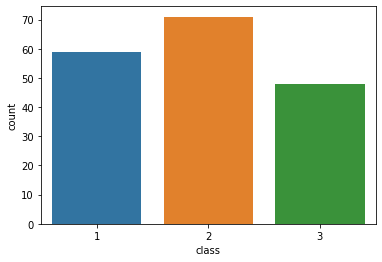

In [48]:
sns.countplot(data = data, x = 'class')

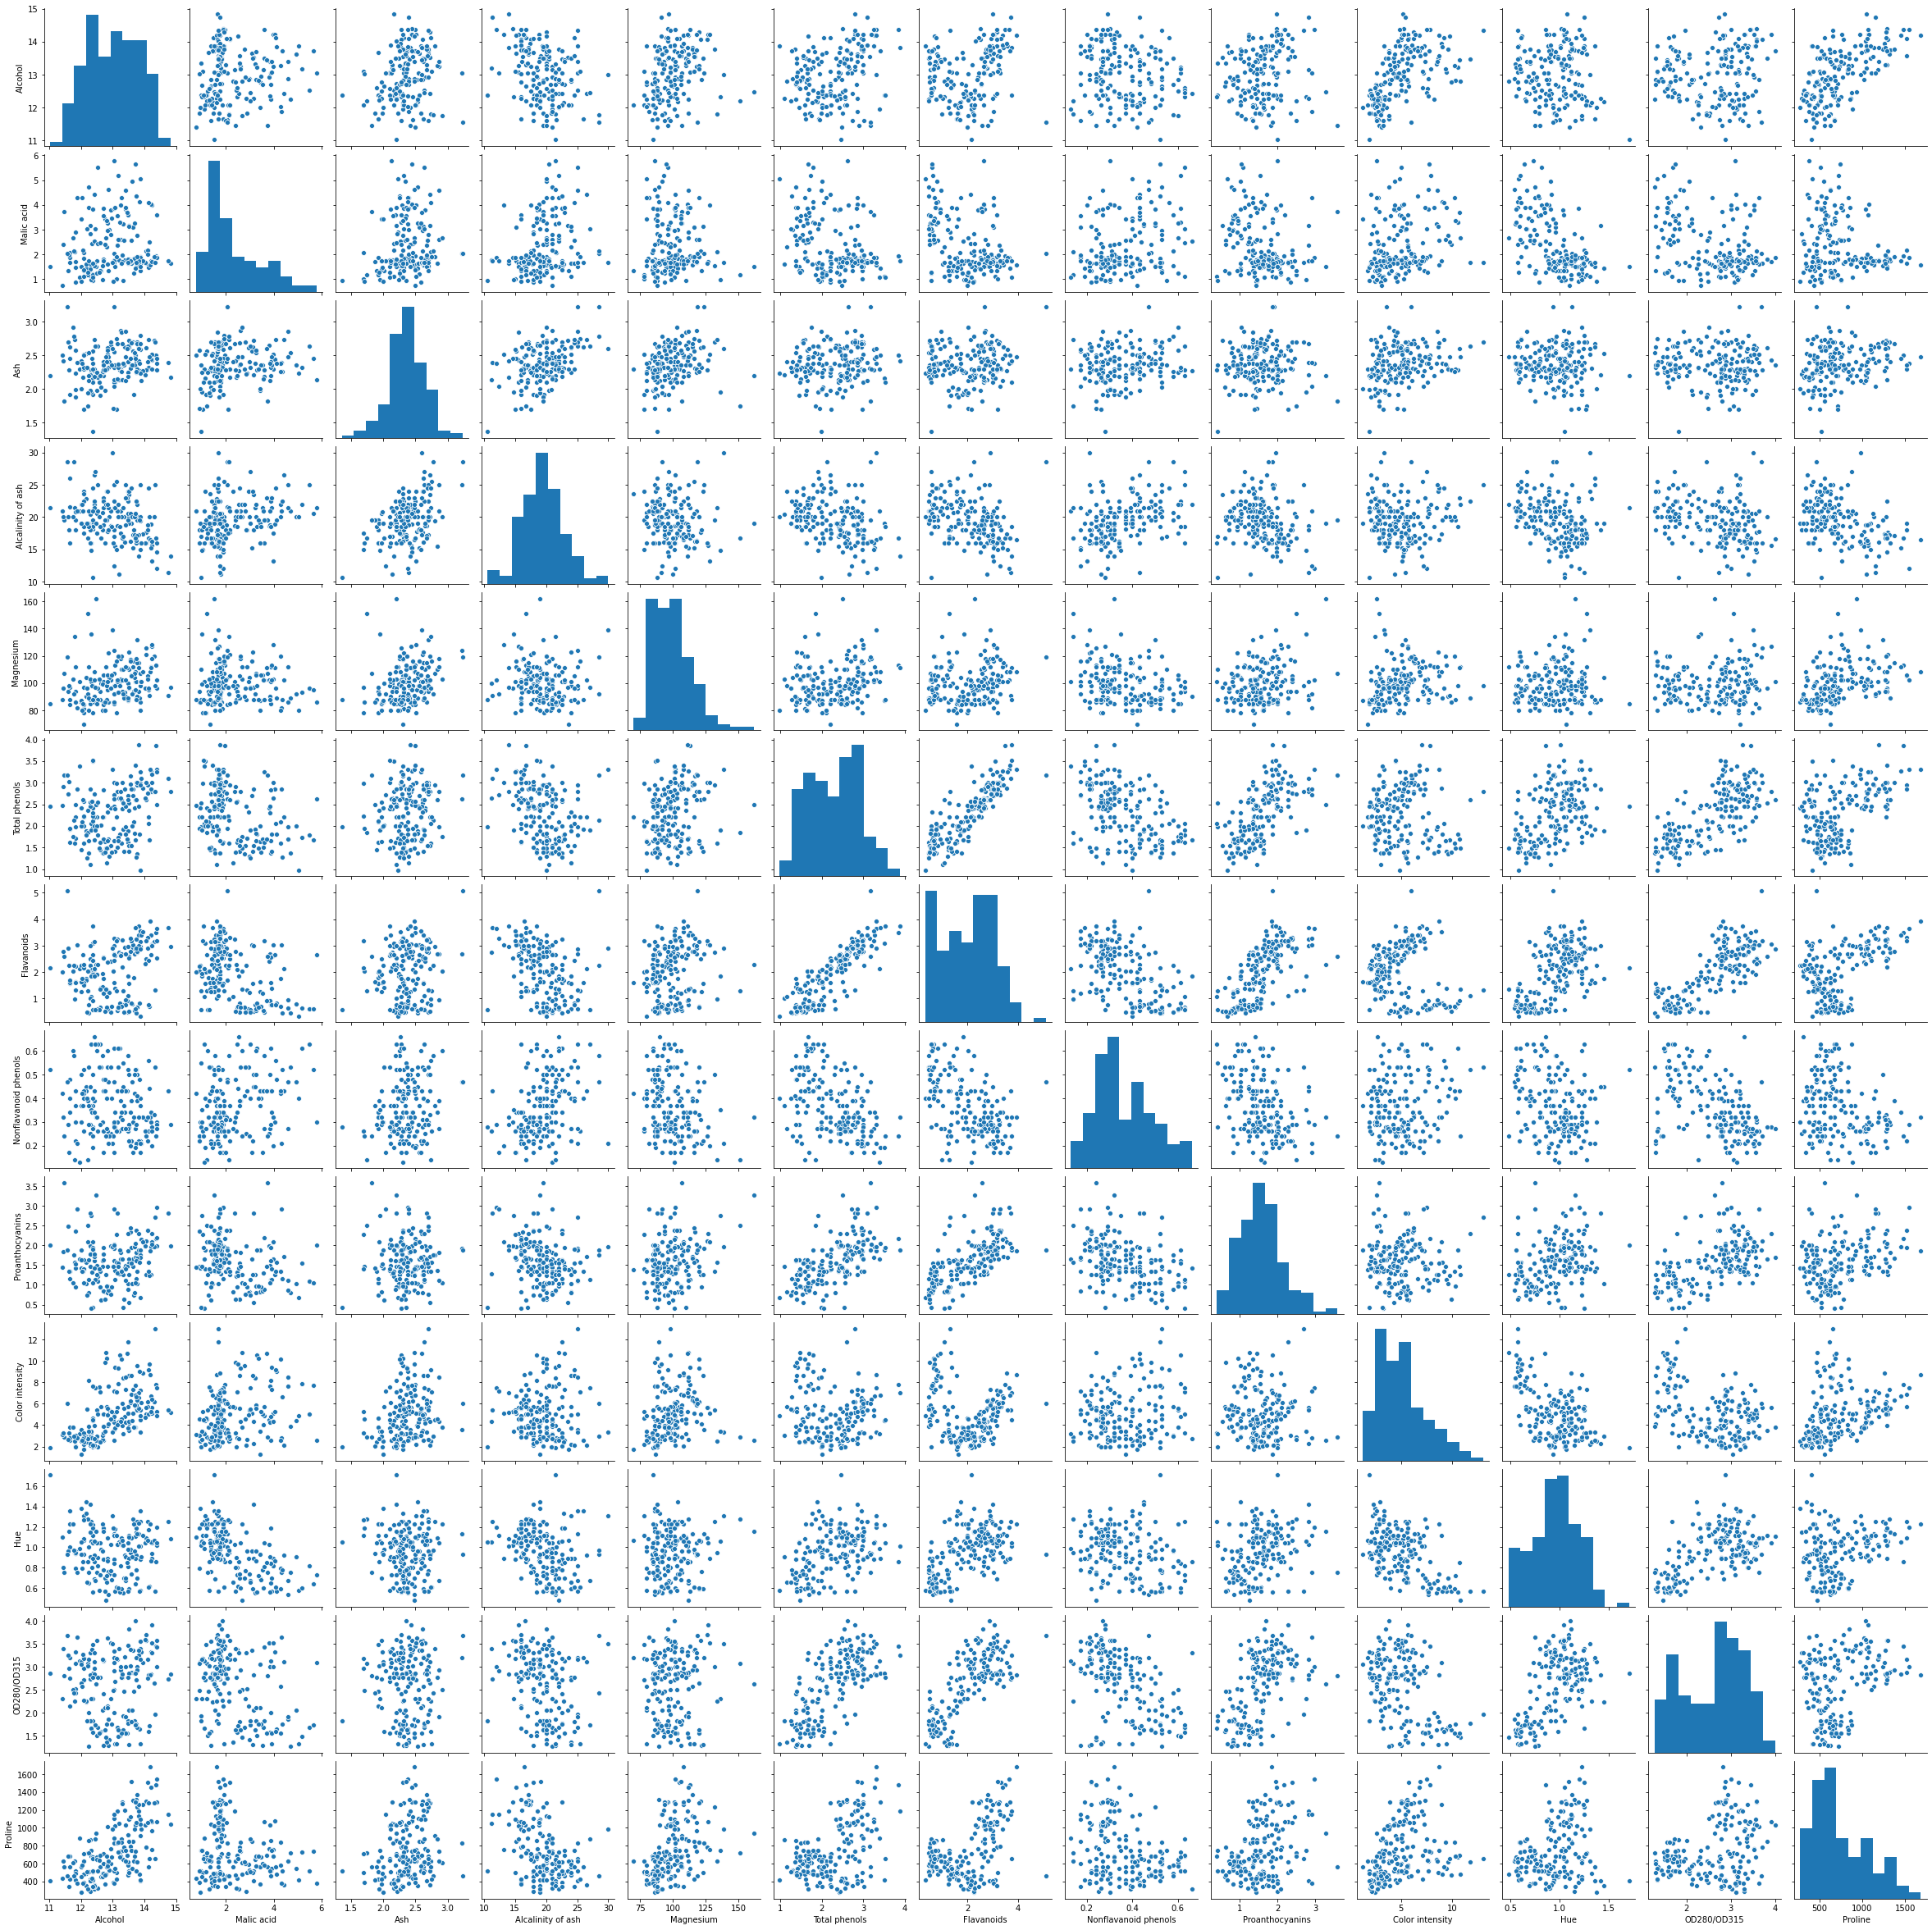

In [15]:
#Visualising the correlarion
sns.pairplot(data)

In [18]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data)
newX=scaler.transform(data)

In [19]:
#Splitig data into test and train sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newX,y,test_size=0.30,random_state=42)

In [20]:
#Logistic Regression alogorithm
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [21]:
accuracy=log.score(X_test,y_test)
accuracy

0.9814814814814815

In [24]:
#Evaluating the model
y_pred = log.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report 
classification_report= classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



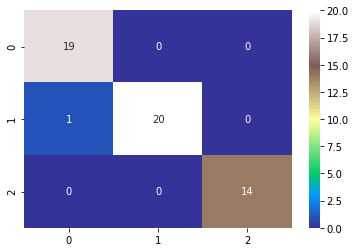

In [86]:
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = "terrain" )
